In [1]:
import pandas as pd
import numpy as np
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from gensim import models,utils
from gensim import corpora
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

C:\Users\Yunmeng\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv(r"C:\Users\Yunmeng\Downloads\LDA_TF.csv")

In [3]:
contents = df["tfWords"]

In [4]:
tags = range(len(contents))

In [5]:
def read_corpus(tokens_only=False):
    for tag, content in zip(tags,contents):
            if tokens_only:
                yield utils.simple_preprocess(line)
            else:
                # For training data, add tags
                yield models.doc2vec.TaggedDocument(utils.simple_preprocess(str(content)), str(tag))

In [6]:
train_corpus = list(read_corpus(tokens_only=False))
model = Doc2Vec(vector_size=30, min_count=2, epochs=55)
model.build_vocab(train_corpus)
train_corpus[0]

TaggedDocument(words=['strategi', 'commun', 'ministri'], tags='0')

In [7]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

Wall time: 48.7 s


In [8]:
infer_vecs=[]
for i in train_corpus:
    infer_vecs.append(model.infer_vector(i[0]))

In [9]:
infer_vecs = [i.astype("float64") for i in infer_vecs]
doc2vecs = pd.DataFrame(infer_vecs)

In [10]:
x = doc2vecs.copy()

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding,LocallyLinearEmbedding
from sklearn.neural_network import BernoulliRBM

In [12]:
bx = BernoulliRBM(n_components=2).fit_transform(x)

In [22]:
lle = LocallyLinearEmbedding()

In [23]:
lx = lle.fit_transform(x)

In [13]:
px=PCA().fit_transform(x)

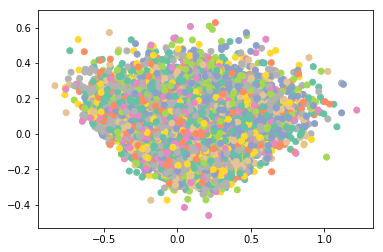

In [14]:
plt.scatter(px[:,0],px[:,1],c=df["Topic"],cmap="Set2")

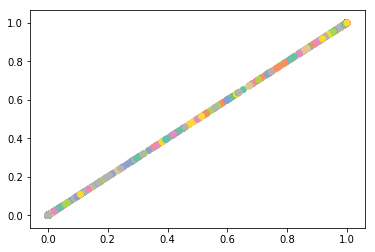

In [15]:
plt.scatter(bx[:,0],bx[:,1],c=df["Topic"],cmap="Set2")